**Practical Application 2**

**What drives the price of a car?**

**Overview**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

In [107]:
# Import necessary libraries for model building

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer

# For visualizing missing data
import missingno as msno  







In [40]:
# Load the dataset
file_path = './data/vehicles.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:\n")
df.info()

# Display the first few rows of the dataset
print("\nFirst 5 Rows:\n")
print(df.head())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  ob

**Analyzing Data**

Distribution of state:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


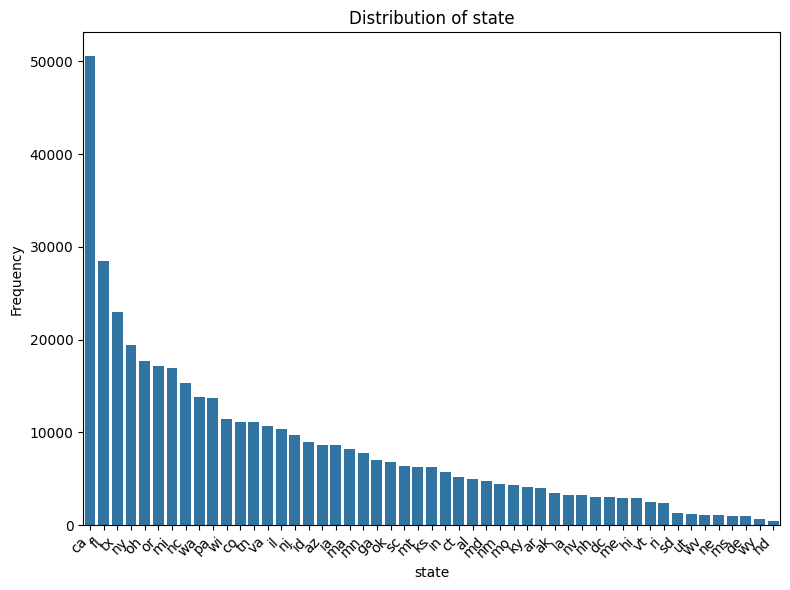

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64
--------------------------------------------------
Distribution of paint_color:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


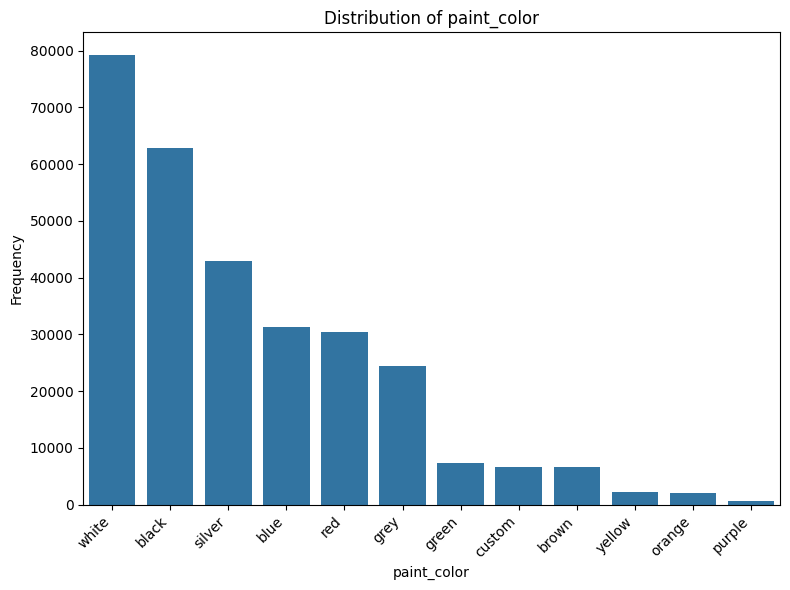

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64
--------------------------------------------------
Distribution of size:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


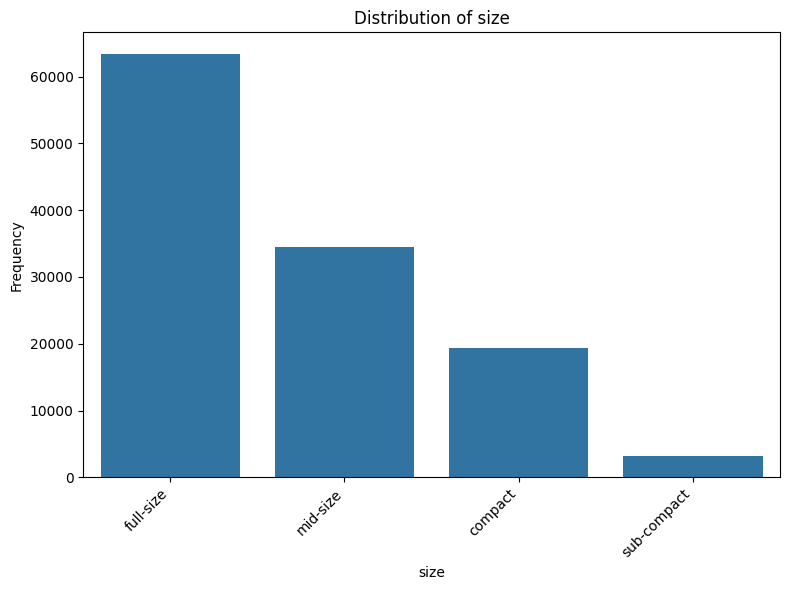

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64
--------------------------------------------------
Distribution of type:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


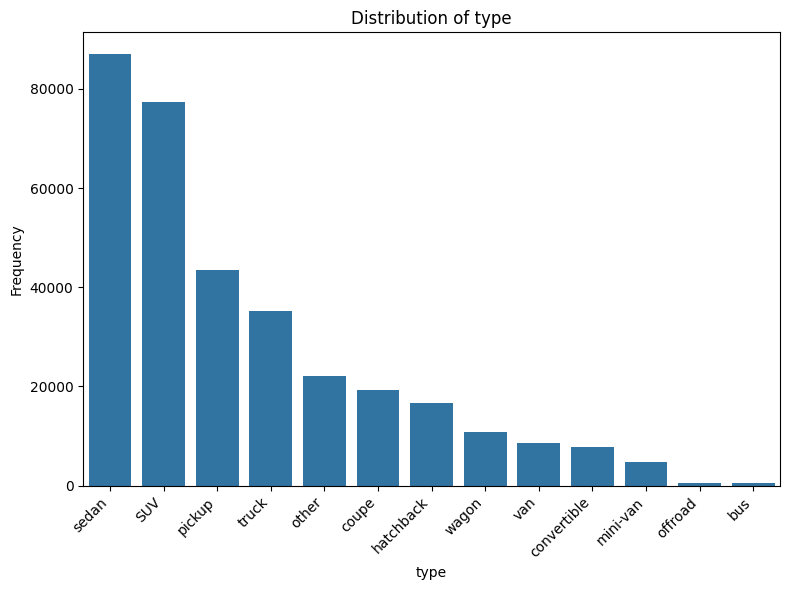

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64
--------------------------------------------------
Distribution of drive:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


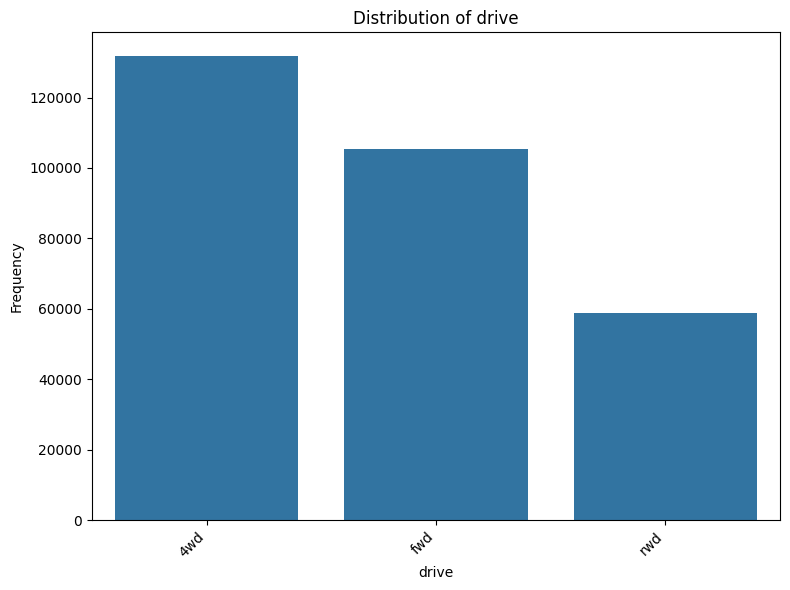

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64
--------------------------------------------------
Distribution of title_status:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


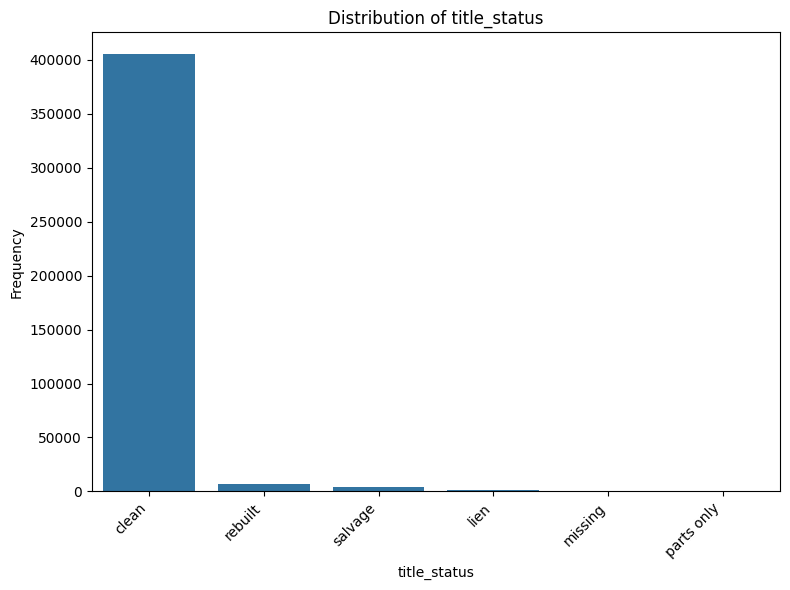

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64
--------------------------------------------------
Distribution of fuel:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


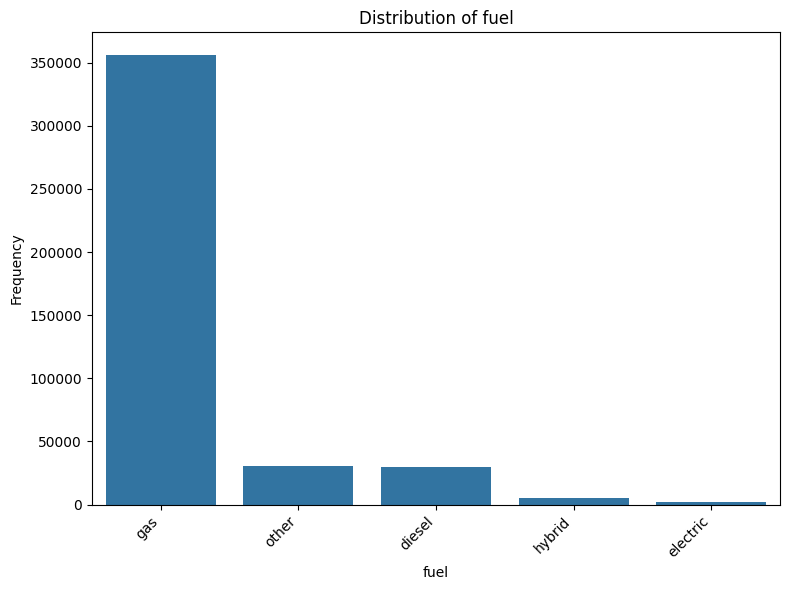

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
--------------------------------------------------
Distribution of cylinders:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


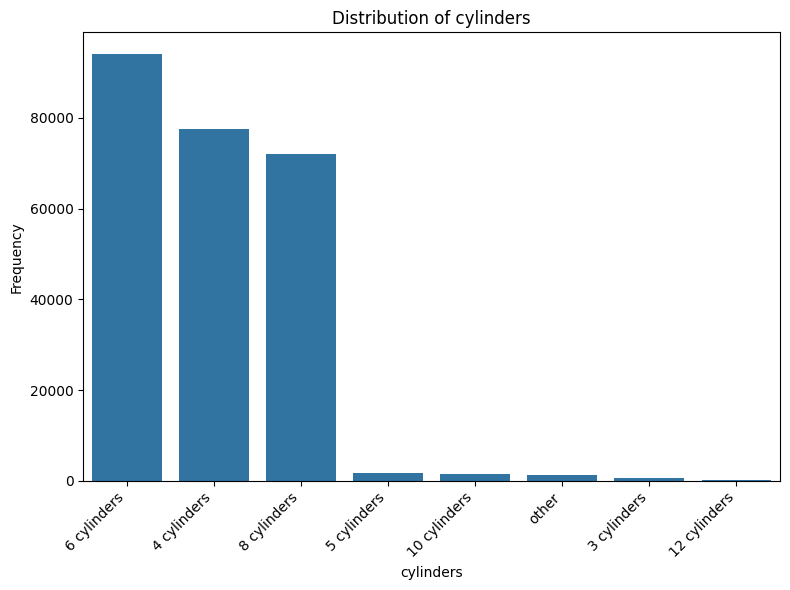

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
--------------------------------------------------
Distribution of manufacturer:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


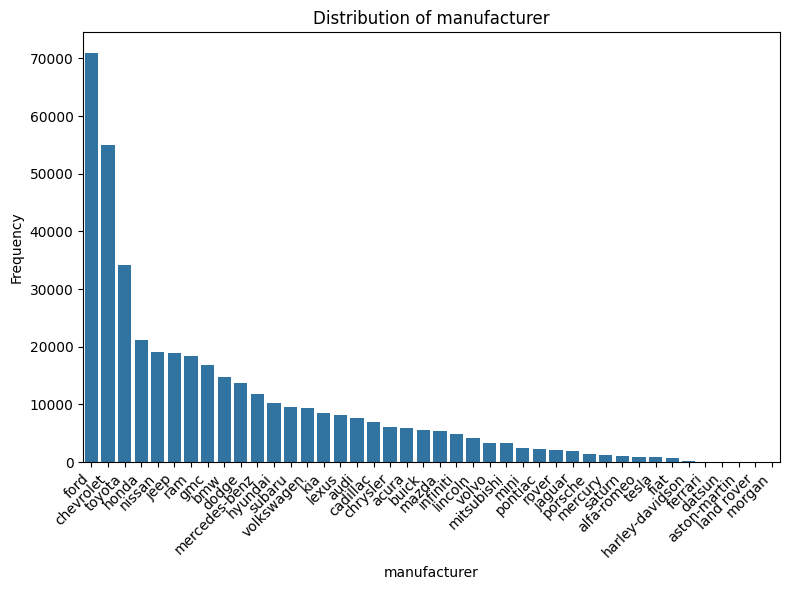

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


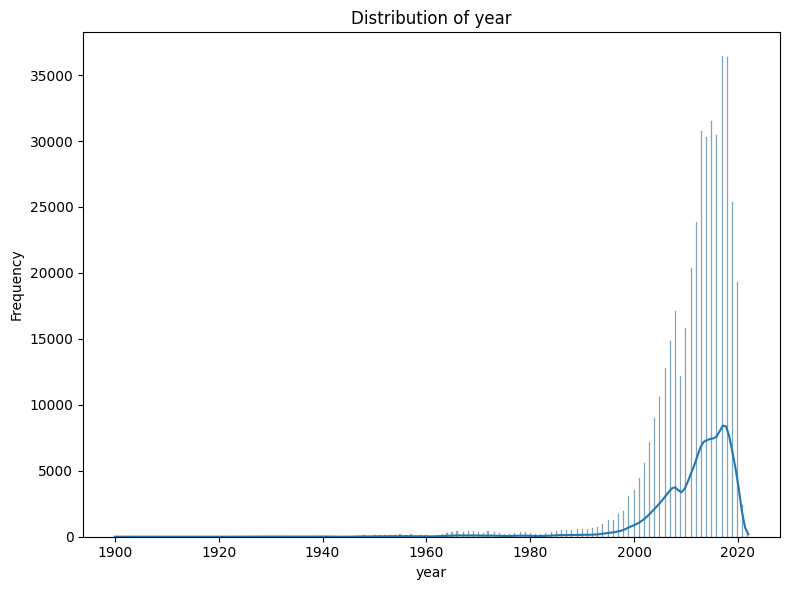

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------
Distribution of condition:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


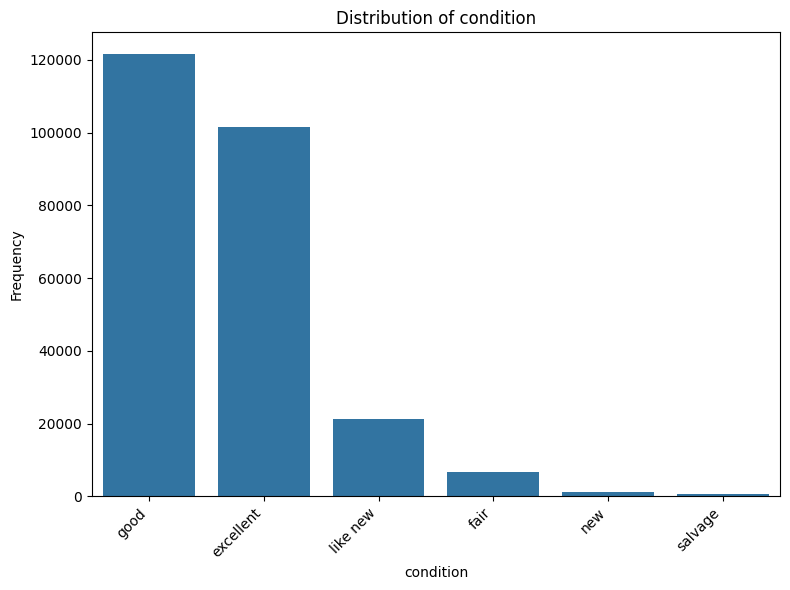

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64
--------------------------------------------------
Distribution of transmission:


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_9268\3408332913.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string


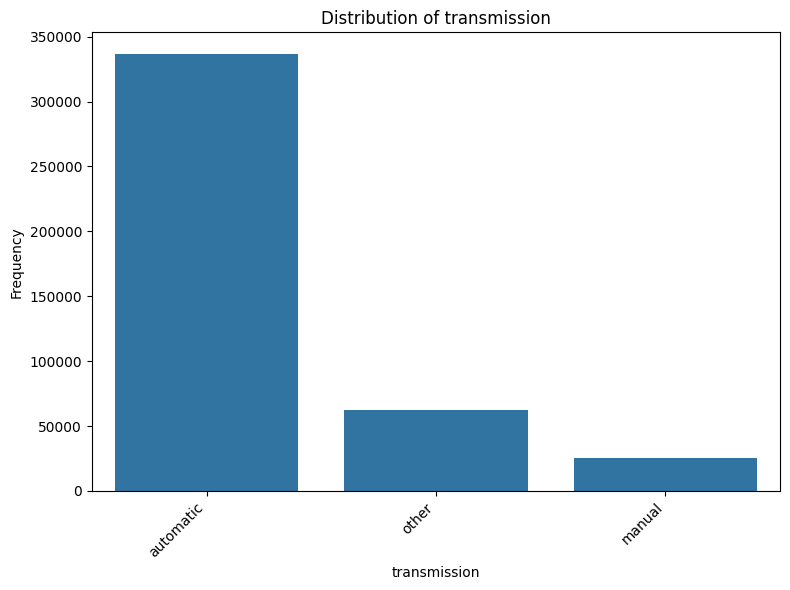

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64
--------------------------------------------------


In [3]:
# List of columns to analyze
columns_to_analyze = ['state', 'paint_color', 'size', 'type', 'drive', 'title_status', 'fuel', 'cylinders','manufacturer','year','condition','transmission',]

# Loop through the columns and create appropriate plots
for column in columns_to_analyze:
    print(f"Distribution of {column}:")

    # Check the data type of the column
    if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':  # Categorical or string
        # Bar plot for categorical features
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.countplot(x=column, data=df, order=df[column].value_counts().index) # Order bars by frequency
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability if needed
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

        # Print value counts (for more detail)
        print(df[column].value_counts())

    elif pd.api.types.is_numeric_dtype(df[column]):  # Numerical
        # Histogram for numerical features
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)  # kde adds a kernel density estimate
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Descriptive statistics (for numerical features)
        print(df[column].describe())

    else:
        print(f"Column '{column}' has an unsupported data type for plotting.")

    print("-" * 50)  # Separator between columns

**For more colorful visualization**

for column in columns_to_analyze:
    if pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        fig = px.histogram(df, x=column, color=column)  # Color by category
        fig.update_layout(title=f'Distribution of {column}')
        fig.show()

    elif pd.api.types.is_numeric_dtype(df[column]):
        fig = px.histogram(df, x=column, marginal="rug", color_discrete_sequence=px.colors.sequential.Plasma) # Rug plot, color scale
        fig.update_layout(title=f'Distribution of {column}')
        fig.show()
    else:
        print(f"Column '{column}' has an unsupported data type for plotting.")

**Cleaning the dataset**

Missing Value Counts per Column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Missing Value Percentages per Column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


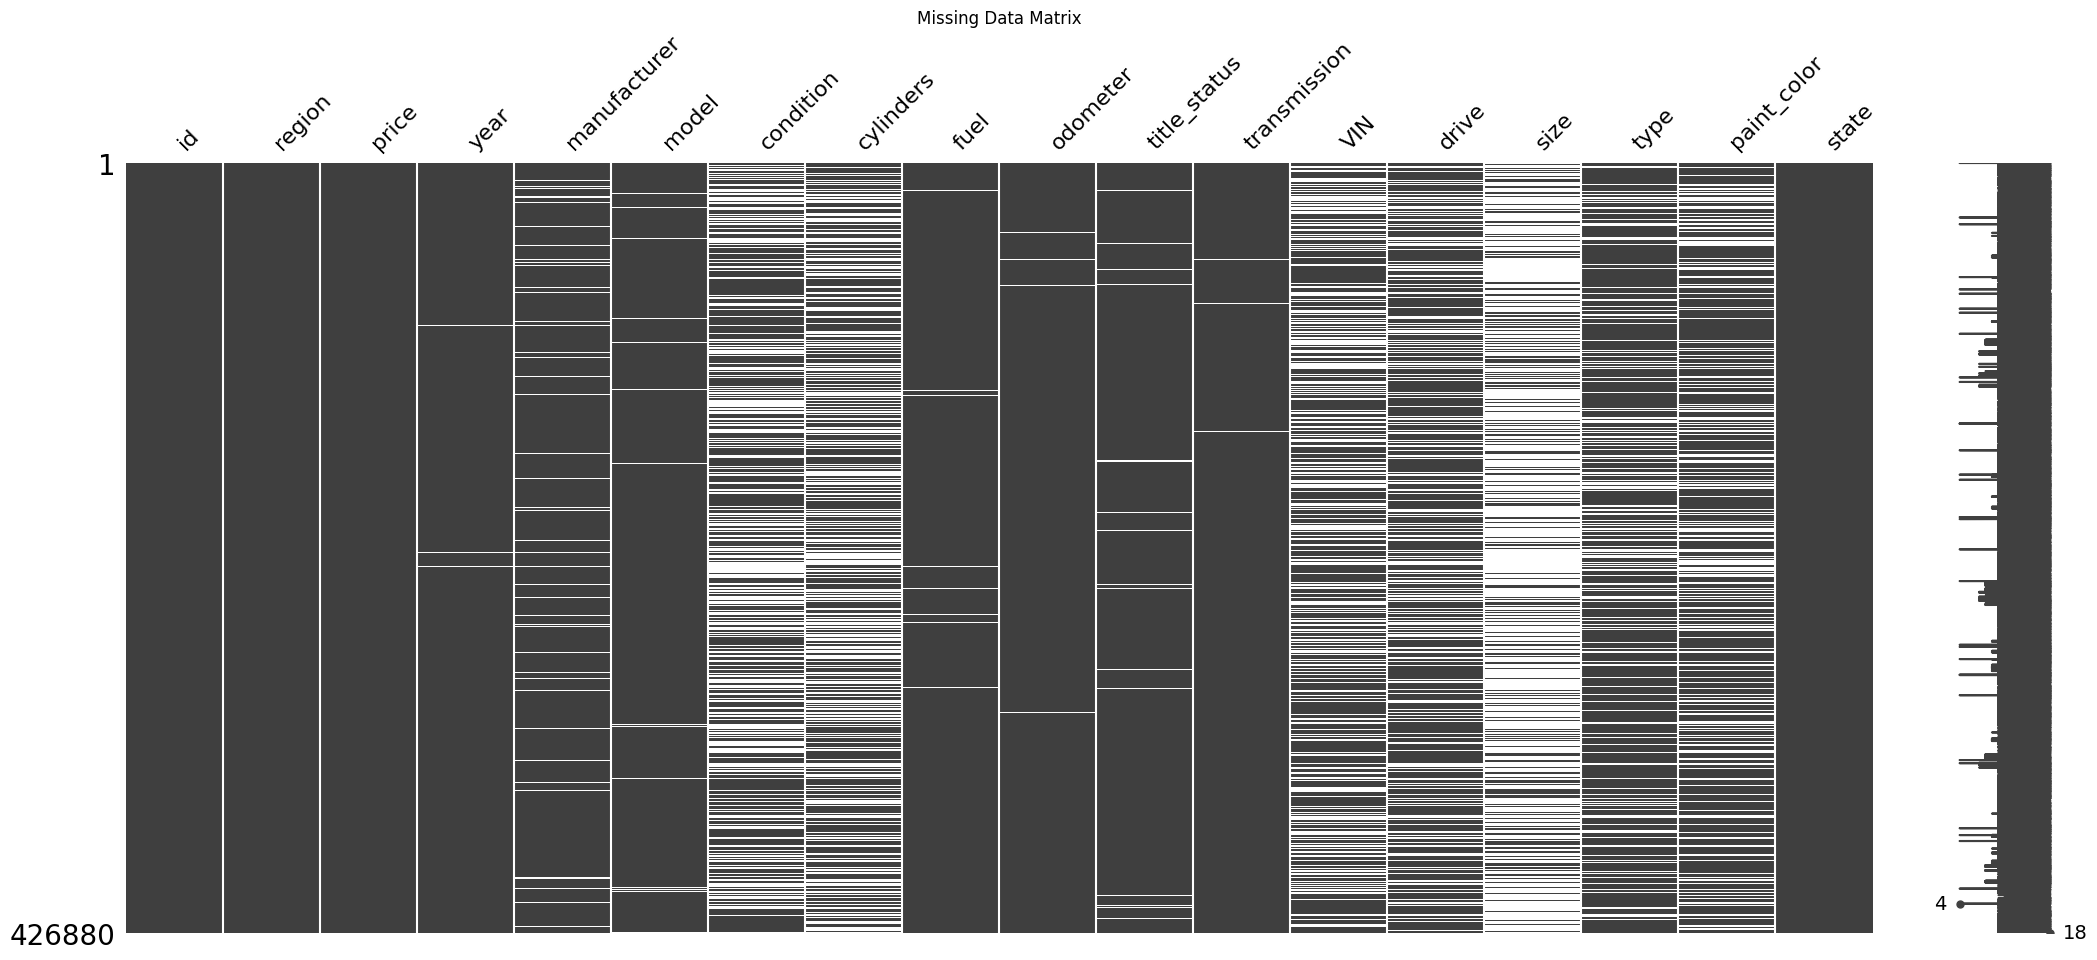

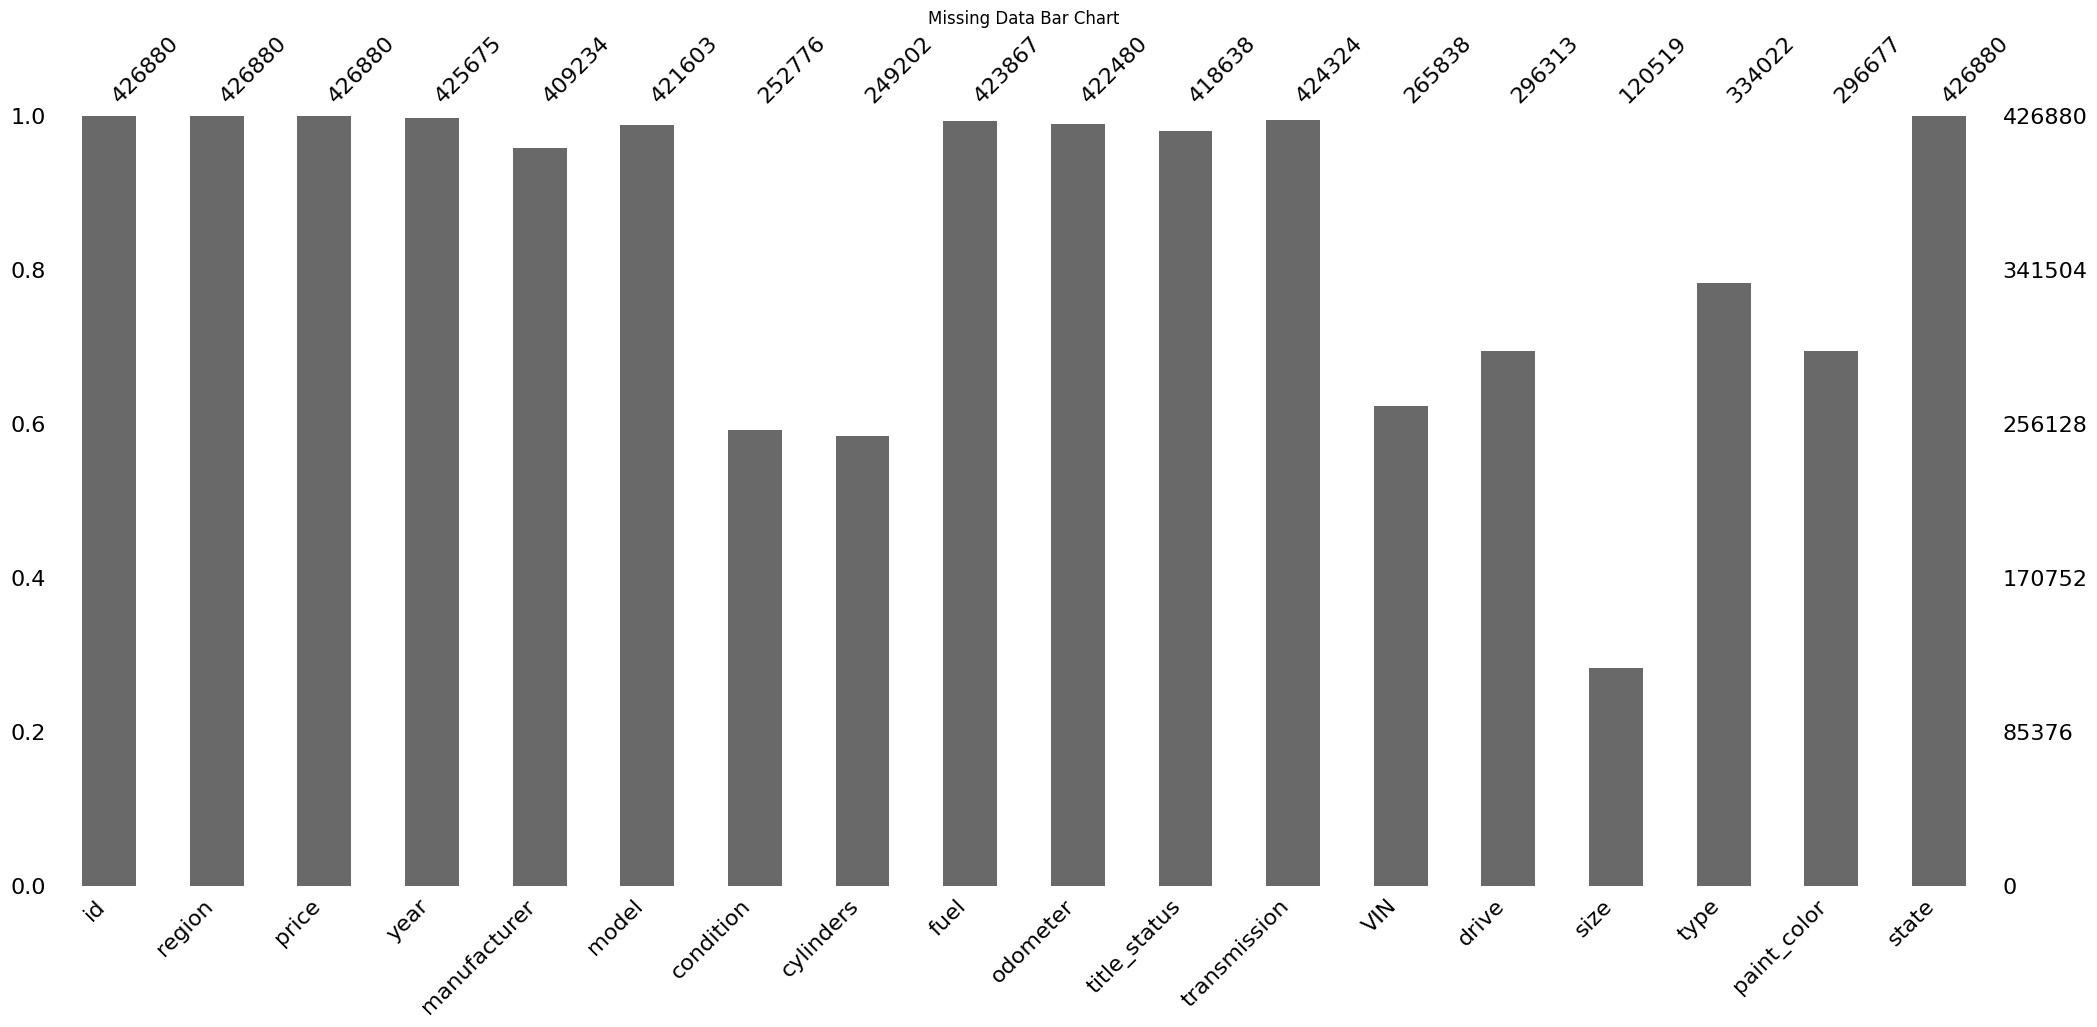

In [4]:
# 2. Initial Exploration of Missing Values

# a) Summary Statistics of Missing Data
print("Missing Value Counts per Column:")
print(df.isnull().sum())  # Shows the number of missing values in each column
print("\nMissing Value Percentages per Column:")
print(df.isnull().sum() / len(df) * 100) # Shows the percentage of missing values

# b) Visualizations
msno.matrix(df)  # Matrix plot of missing values (white lines = missing)
plt.title("Missing Data Matrix")
plt.show()

msno.bar(df)  # Bar chart of missing value counts
plt.title("Missing Data Bar Chart")
plt.show()

**K-Nearest Neighbors (KNN) imputation is a sophisticated method for handling missing values in a dataset. It works by finding the 'k' nearest neighbors (data points) to the missing value based on the similarity of other features. However, it's important to note that KNN imputation can be computationally intensive, especially for large datasets, as it requires calculating distances between data points.**

In [42]:
# d) KNN Imputation (More sophisticated, considers neighbors)
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors
#df[['odometer', 'year']] = imputer.fit_transform(df[['odometer', 'year']]) # Impute on multiple columns

In [92]:
df_cleaned = df.copy()

In [93]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   model         426880 non-null  object 
 6   condition     426880 non-null  object 
 7   cylinders     426880 non-null  object 
 8   fuel          426880 non-null  object 
 9   odometer      426880 non-null  float64
 10  title_status  426880 non-null  object 
 11  transmission  426880 non-null  object 
 12  drive         426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [94]:
df_cleaned.dropna(subset=['year', 'odometer', 'price'], inplace=True)  # Drops rows where ANY of these columns are NaN
#OR
df_cleaned.dropna(subset=['year'], inplace=True) #Drops rows where 'year' column is NaN
df_cleaned.dropna(subset=['odometer'], inplace=True) #Drops rows where 'odometer' column is NaN
df_cleaned.dropna(subset=['price'], inplace=True) #Drops rows where 'price' column is NaN

In [95]:
# Convert data types
#df_cleaned['year'] = df_cleaned['year'].astype(int)
#df_cleaned['odometer'] = df_cleaned['odometer'].astype(int)
#df_cleaned['price'] = df_cleaned['price'].astype(int)

num_rows_before = len(df_cleaned)


# Feature Engineering: Categorize odometer readings
df_cleaned['odometer_bin'] = pd.cut(df_cleaned['odometer'], 
                                    bins=[0, 50000, 100000, 150000, 200000, np.inf], 
                                    labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

# Encode ordinal categorical variables
condition_map = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0, 'Unknown': -1}

# Convert the 'condition' column to lowercase for case-insensitive matching
df_cleaned['condition'] = df_cleaned['condition'].str.lower() # Added this line

df_cleaned['condition'] = df_cleaned['condition'].map(condition_map)


# One-hot encode categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['fuel', 'transmission', 'drive', 'type', 'paint_color'], drop_first=True)

# 2. Apply the filtering
df_cleaned = df_cleaned[(df_cleaned['price'] > 500) & (df_cleaned['price'] < 100000)]

# 3. Get the number of rows AFTER filtering
num_rows_after = len(df_cleaned)

# 4. Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

# 5. Print the results
print(f"Number of rows before filtering: {num_rows_before}")
print(f"Number of rows after filtering: {num_rows_after}")
print(f"Number of rows removed: {num_rows_removed}")

# Feature Engineering: Add car age
df_cleaned['car_age'] = 2025 - df_cleaned['year']



# Feature Engineering: Categorize odometer readings
df_cleaned['odometer_bin'] = pd.cut(df_cleaned['odometer'], 
                                    bins=[0, 50000, 100000, 150000, 200000, np.inf], 
                                    labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

# Display cleaned dataset info
print("\nCleaned Dataset Info:\n")
df_cleaned.info()



Number of rows before filtering: 426880
Number of rows after filtering: 383068
Number of rows removed: 43812

Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 383068 entries, 0 to 426879
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      383068 non-null  int64   
 1   region                  383068 non-null  object  
 2   price                   383068 non-null  int64   
 3   year                    383068 non-null  float64 
 4   manufacturer            383068 non-null  object  
 5   model                   383068 non-null  object  
 6   condition               238418 non-null  float64 
 7   cylinders               383068 non-null  object  
 8   odometer                383068 non-null  float64 
 9   title_status            383068 non-null  object  
 10  state                   383068 non-null  object  
 11  odometer_bin            382007 non-null  

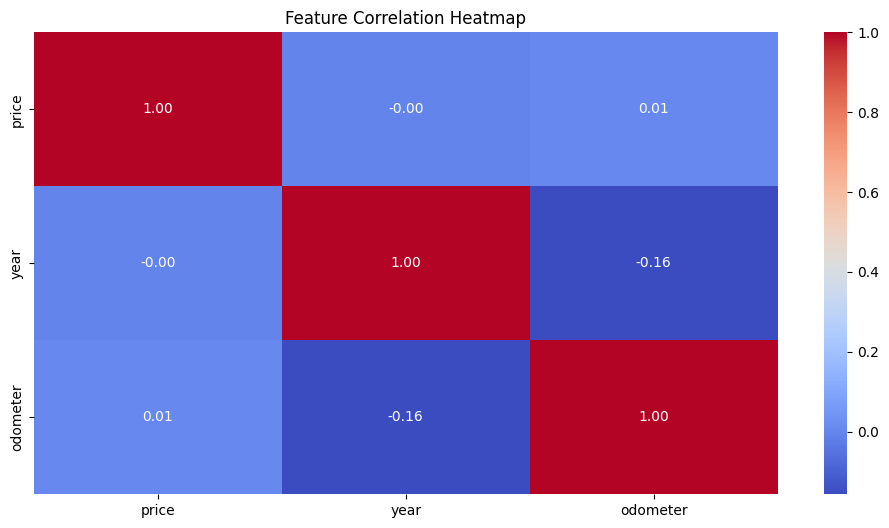

In [52]:
# Check correlations between numeric variables
plt.figure(figsize=(12, 6))
sns.heatmap(df[['price', 'year', 'odometer']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

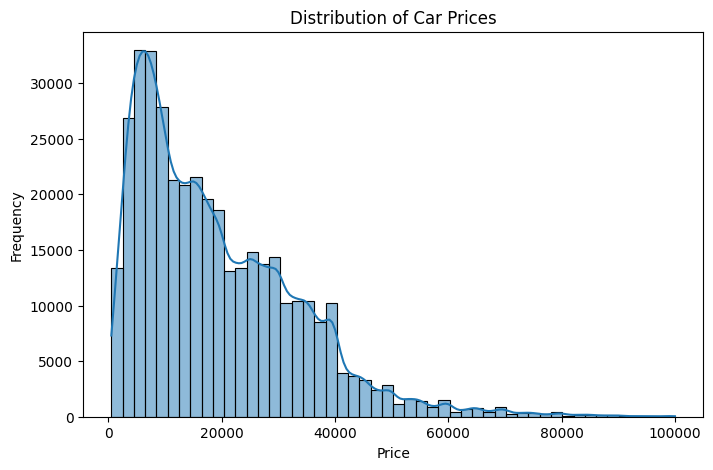

In [15]:
# Visualizing the distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

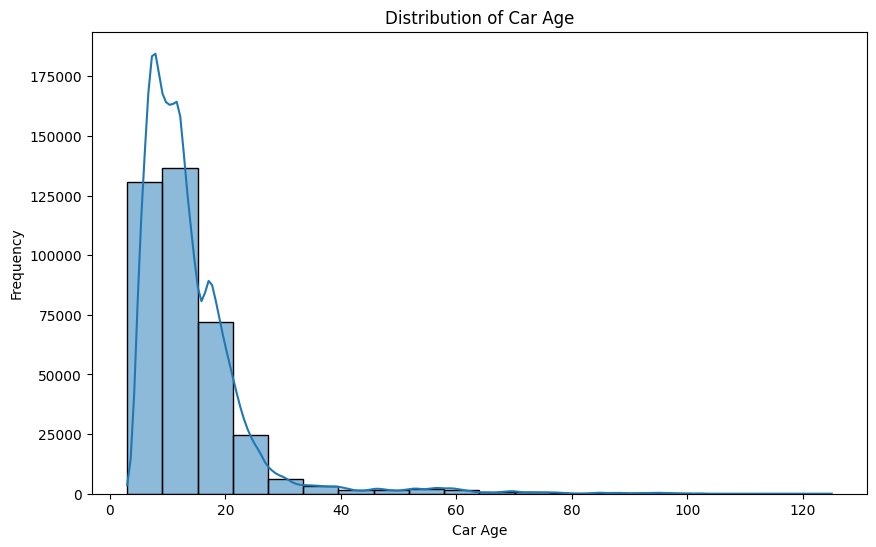

In [78]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['car_age'], bins=20, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.show()

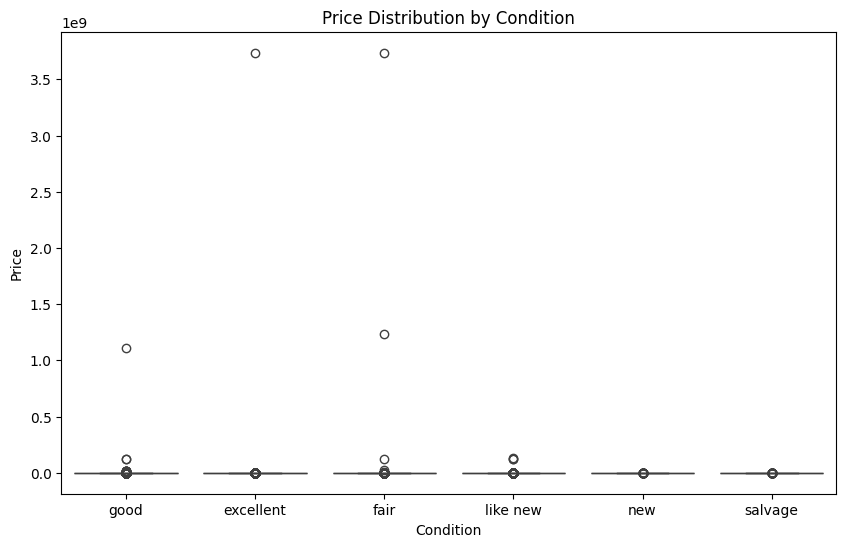

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

**Data Preprocessing, Splitting, and Model Building**

In [98]:
# Step 2: Prepare feature set (X) and target (y)
# Drop the target column and any unnecessary columns
X = df_cleaned.drop(columns=['price']) 
y = df_cleaned['price']


In [99]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Drop the columns with NaNs BEFORE imputation and scaling
columns_to_drop = ['condition', 'odometer_bin']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [101]:

# Step 4: Scaling the data (only for models like Linear Regression)
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
# Example: Dropping non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scaling the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [102]:


# Now you should have NO NaNs in X_train or X_test
print("NaNs in X_train after dropping:", X_train.isnull().sum().sum())
print("NaNs in X_test after dropping:", X_test.isnull().sum().sum())

# Example: Dropping non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scaling the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Check again to be absolutely sure
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())

NaNs in X_train after dropping: 0
NaNs in X_test after dropping: 0
NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0


In [103]:
# Step 5: Model 1 - Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Evaluate the Linear Regression model
print("Linear Regression Performance:")
print(f"R²: {r2_score(y_test, y_pred_lin_reg)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lin_reg)}")

Linear Regression Performance:
R²: 0.15212102284884832
Mean Squared Error: 176724206.99798486


**Interpretation**

Linear regression model has the following performance metrics - 


R-squared (R²): 0.15212102284884832

Interpretation:  R² measures the proportion of the variance in the dependent variable ('price' in your case) that is predictable from the independent variables (the features you used in your model).  An R² of 0.152 means that your model explains only about 15.2% of the variability in car prices.  The remaining 84.8% of the variability is not captured by your model.

Significance: This is a relatively low R² value, suggesting that your linear regression model is not a very good fit for the data.  It indicates that there are likely other important factors influencing car prices that are not included in your current set of features, or that the relationships are not linear.

Mean Squared Error (MSE): 176724206.99798486

Interpretation: MSE measures the average squared difference between the predicted car prices and the actual car prices.  A lower MSE is better.  Because the error is squared, it gives more weight to larger errors.

Significance: The MSE value of 176,724,206 is quite high.  To understand how "high" it is, you need to consider the scale of your target variable ('price').  If the prices of the cars in your dataset are in the tens of thousands or hundreds of thousands, then an average squared error of this magnitude is substantial.  If your prices are in a much higher range, then it might be less concerning, but it's still important to consider in the context of your data.

Overall Interpretation:

The combination of a low R² and a high MSE indicates that your linear regression model has significant limitations in predicting car prices.  

In [106]:
# Step 7: Model 3 - XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)

# Evaluate the XGBoost model
print("\nXGBoost Performance:")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}")


XGBoost Performance:
R²: 0.495488703250885
Mean Squared Error: 105155752.0


**Interpretation**

Your XGBoost model has shown a significant improvement compared to the linear regression model with the following performance metrics:

XGBoost:

R²: 0.495488703250885
Mean Squared Error: 105155752.0
Linear Regression:

R²: 0.15212102284884832
Mean Squared Error: 176724206.99798486
Interpretation:

Significant Improvement: The XGBoost model shows a substantial improvement over the Linear Regression model.  The R² has increased from 0.152 to 0.495, and the MSE has decreased from 176,724,207 to 105,155,752.

Meaning of Improvement:

R²: The XGBoost model explains approximately 49.5% of the variance in car prices, compared to just 15.2% for Linear Regression. This is a much better fit, though there's still room for improvement.
MSE: The XGBoost model's average squared error is significantly lower than the Linear Regression model's, indicating that its predictions are, on average, closer to the actual car prices.
Overall Assessment:

XGBoost is performing considerably better than Linear Regression, suggesting that it's better at capturing the underlying relationships in your data.

In [108]:
# Ridge Regression (with cross-validation for best alpha)
ridge_reg = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate Ridge Regression model
print("\nRidge Regression Performance:")
print(f"R²: {r2_score(y_test, y_pred_ridge)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")

C:\Users\WH157PP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:2375: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(



Ridge Regression Performance:
R²: 0.15211072721674923
Mean Squared Error: 176726352.9261978


Your Ridge Regression results show the following performance:

R² (R-squared): 0.152
Mean Squared Error (MSE): 176,726,352.93
Interpretation:

R² (0.152): This indicates that your Ridge Regression model explains only about 15.2% of the variance in your target variable.  This is a very low R-squared value, suggesting that the model is not a good fit for the data.  A perfect R² is 1.0, and a value close to 0 indicates that the model is not explaining much of the variance.

MSE (176,726,352.93):  This high MSE value shows that, on average, the squared difference between your model's predictions and the actual values is very large.  Because MSE is in squared units, it's sometimes difficult to interpret directly.  However, in the context of your high MSE and low R², it confirms that the model's predictions are not very accurate.

Comparison with Previous Results (presumably Linear Regression):

It appears your Ridge Regression results are nearly identical to your previous Linear Regression results (R²: ~0.152, MSE: ~176,724,207). This is not surprising. Ridge Regression is a form of regularized linear regression.  If the regularization (controlled by the alpha parameter) isn't having a significant effect (likely because the "ordinary" linear regression is already so poor), the results will be very similar.


Tried running some additional models but the code just kept running and did not produce a result. Couldn't debug the issue in time. 

In [109]:
data = df_cleaned

In [112]:

X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)


In [ ]:
# Assuming 'price' is the target variable and the rest are features
X = data.drop('price', axis=1)
y = data['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# K-Neighbors Regressor
kn_model = KNeighborsRegressor()
kn_model.fit(X_train_scaled, y_train)
kn_predictions = kn_model.predict(X_test_scaled)

# Bayesian Ridge Regression
br_model = BayesianRidge()
br_model.fit(X_train_scaled, y_train)
br_predictions = br_model.predict(X_test_scaled)

# Evaluate Models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

evaluate_model('Support Vector Regression', y_test, svr_predictions)
evaluate_model('Decision Tree Regressor', y_test, dt_predictions)
evaluate_model('Random Forest Regressor', y_test, rf_predictions)
evaluate_model('Gradient Boosting Regressor', y_test, gb_predictions)
evaluate_model('K-Neighbors Regressor', y_test, kn_predictions)
evaluate_model('Bayesian Ridge Regression', y_test, br_predictions)